## Load The data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv",delimiter=",",encoding="utf-8",index_col=0)

In [3]:
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


## save the data frame to database

In [ ]:
import sqlite3
con = sqlite3.connect("covid-db")
df.to_sql("patients", con, index=False, if_exists="replace")


In [ ]:
con = sqlite3.connect("covid-db")
cur = con.cursor()

In [ ]:
pd.read_sql_query("""
select * from patients
""",con)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [ ]:
results_class = pd.read_sql_query("select count(distinct result) as result_unique from patients",con)
results_class

,result_unique
0,2


In [ ]:
count_class = pd.read_sql_query("select result,count(result) as result_unique from patients group by result",con)


In [ ]:
count_class

,result,result_unique
0,0,755
1,1,108


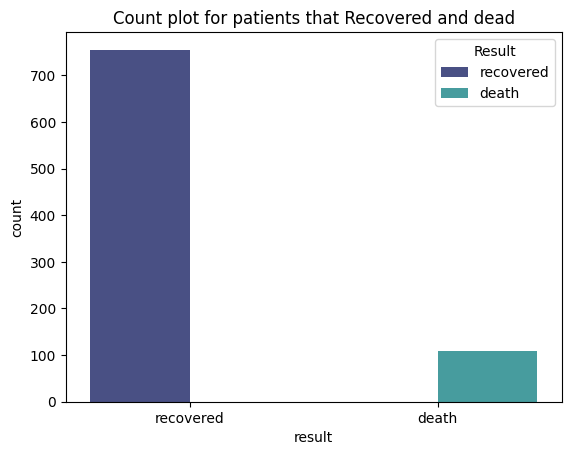

In [28]:
ax = sns.countplot(df, x="result",hue='result',palette='mako')
plt.legend(title='Result',labels=['recovered','death'])
ax.set_title('Count plot for patients that Recovered and dead')
plt.savefig("count_plot_for_label_dist.png")
ax.set_xticklabels(['recovered','death'])
plt.show()

As we can see we have a problem in the distribution of labels which is called imbalancing

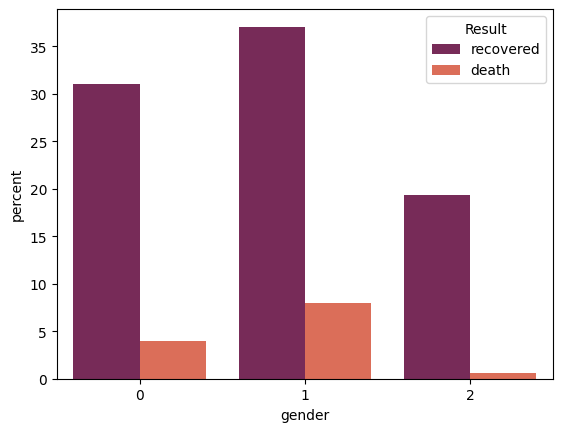

In [ ]:
sns.countplot(df, x="gender",hue='result',stat='percent',palette='rocket')
plt.legend(title='Result',labels=['recovered','death'])

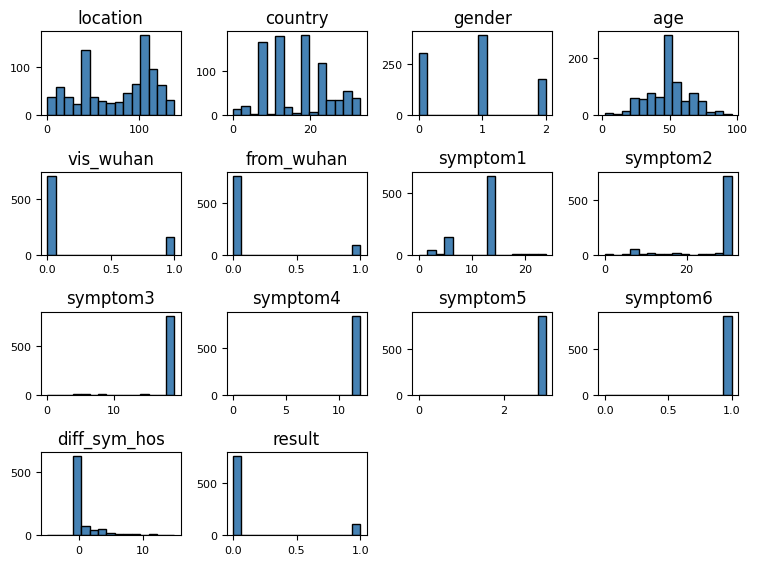

In [ ]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

## Plot the data using t-sne approach

In [17]:
from sklearn.manifold import TSNE
tsne2d = TSNE(n_components=2,learning_rate='auto',random_state=2023)
tsne3d = TSNE(n_components=3,learning_rate='auto',random_state=2023)
compressed_2features = tsne2d.fit_transform(df)
compressed_3features = tsne3d.fit_transform(df)

In [19]:
import plotly.express as px
fig_2d = px.scatter(
    compressed_2features, x=0, y=1,
    color=df.result, labels={'color': 'result',"0":"feature 1","1":"feature 2"},
    title="Projected Data Points in 2d using T-SNE"
)
fig_3d = px.scatter_3d(
    compressed_3features, x=0, y=1, z=2,
    color=df.result, labels={'color': 'result',"0":"feature 1","1":"feature 2","2":"feature 3"},
    title="Projected Data Points in 3d using T-SNE"
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

In [20]:
str_html = fig_3d.to_html()
with open("/content/plot3d_tsne_all_features.html","w") as file:
    file.write(str_html)

## Plot the data using UMAP approach

In [4]:
! pip install umap-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.0 MB/s eta 0:00:00


In [11]:
import plotly.express as px
from umap import UMAP

umap_2d = UMAP(n_components=2, init='random', random_state=2023)
umap_3d = UMAP(n_components=3, init='random', random_state=2023)

proj_2d = umap_2d.fit_transform(df)
proj_3d = umap_3d.fit_transform(df)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.result, labels={'color': 'result',"0":"feature 1","1":"feature 2"},
    title="Projected Data Points in 2d"
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.result, labels={'color': 'result',"0":"feature 1","1":"feature 2","2":"feature 3"},
    title="Projected Data Points in 3d"
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [13]:
str_html = fig_3d.to_html()

In [16]:
with open("/content/plot3d_UMP_all_features.html","w") as file:
    file.write(str_html)